# Bank Customer Churn

## Objetivos:

Utilizando dados públicos de um Banco no Site Kaggle, tive como objetivo principal a construção de um algoritmo de Machine Learning que classifique um cliente em churn ou não. Churn é o termo utilizado para se referir ao cliente que cancela o contrato com uma empresa, fazendo com que a sua receita seja afetada de forma negativa. Com base nisto, o algoritmo foi criado para antecipar este cliente antes que ele entre em churn, para que a empresa possa recuperar este cliente antes que ele a deixe

## Variáveis:

Antes de iniciar o projeto, estas são as variáveis presente em meu banco de dados e o seus significados

- customer_id = Account Number / Número da conta

- credit_score = Credit Score / Pontuação de Crédito

- country = Country of Residence / País de Residência

- gender = Sex / Gênero

- age = Age / Idade

- tenure = From how many years he/she is having bank acc in ABC Bank? / A partir de quantos anos ele-ela possui conta no Banco ABC?

- balance = Account Balance / Salto da Conta

- products_number = Number of Product from bank / Número do Produto do Banco

- credit_card = Is this customer have credit card ? / Este consumidor tem cartão de credito?

- active_member = Is he/she is active Member of bank ? / Ele ou ela é um membro ativo do banco?

- estimated_salary = Estimated Salary / Estimativa de Salário

- churn = 1 - If the client has left the bank during some period or 
0 - if he or she has not / 1 - Se o cliente tenha saído do banco durante algum periodo ou 0 - se o cliente não tenha saído

## Importando bibliotecas

In [396]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import date, datetime
import plotly.express as px
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
import warnings
cores = 'Accent'
warnings.filterwarnings('ignore')

## Importando e Verificando os Dados

Nesta etapa, conheceremos o dataset e também o analisaremos, afim de entender melhor com o que será trabalhado e verificar há alguma linha duplicada ou algum valor nulo que poderá atrapalhar nossa análise

In [3]:
# Importando a Base de Dados
df = pd.read_csv(r'Bank Customer Churn Prediction.csv')

In [4]:
# Verificando a Base de Dados
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [456]:
# Verificando a quantidade de linhas e colunas
df.shape

(10000, 11)

In [6]:
# Verificando algumas estatísticas 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
credit_score,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
products_number,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
credit_card,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
active_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
churn,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [7]:
# Observando se há linha duplicada
df[df.duplicated()]

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn


In [8]:
# Observando se há valor nulo
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

Após analisar a base de dados, conclui que a coluna "Costumer_Id" não será muito útil para as análises e para o algoritmo, portanto, será deletada do banco de dados

In [9]:
# Deletando a coluna Customer_id
del df["customer_id"]

## Análise Exploratória dos Dados

Após importar a base de dados e fazer algumas verificações, agora vamos fazer uma Análise Exploratória dos Dados, afim de fazer uma análise um pouco mais profunda que a anterior para descobrir como os dados se comportam entre si. Para isso, serão utilizados alguns gráficos

In [10]:
# Relembrando as variáveis
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


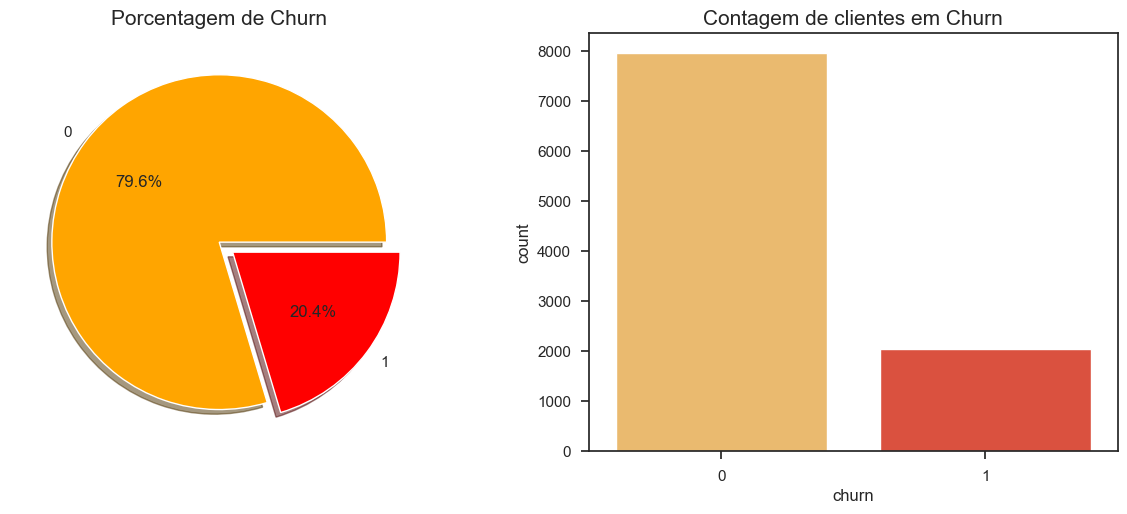

In [512]:
# Gráfico para saber a quantidade de clientes que estão em Churn(1) e os que não estão em Churn(0)
valores = df['churn'].value_counts()
plt.figure(figsize = (15,25))

plt.subplot(4,2,1)
plt.pie(valores,  labels = valores.index,colors =['orange','red'], autopct = '%1.1f%%',shadow = True, explode = (0,0.10))
plt.title("Porcentagem de Churn",fontsize = 15)

plt.subplot(4,2,2)
sns.countplot(x = df['churn'],palette='YlOrRd').set_title('Contagem de clientes em Churn',fontdict = { 'fontsize': 15});

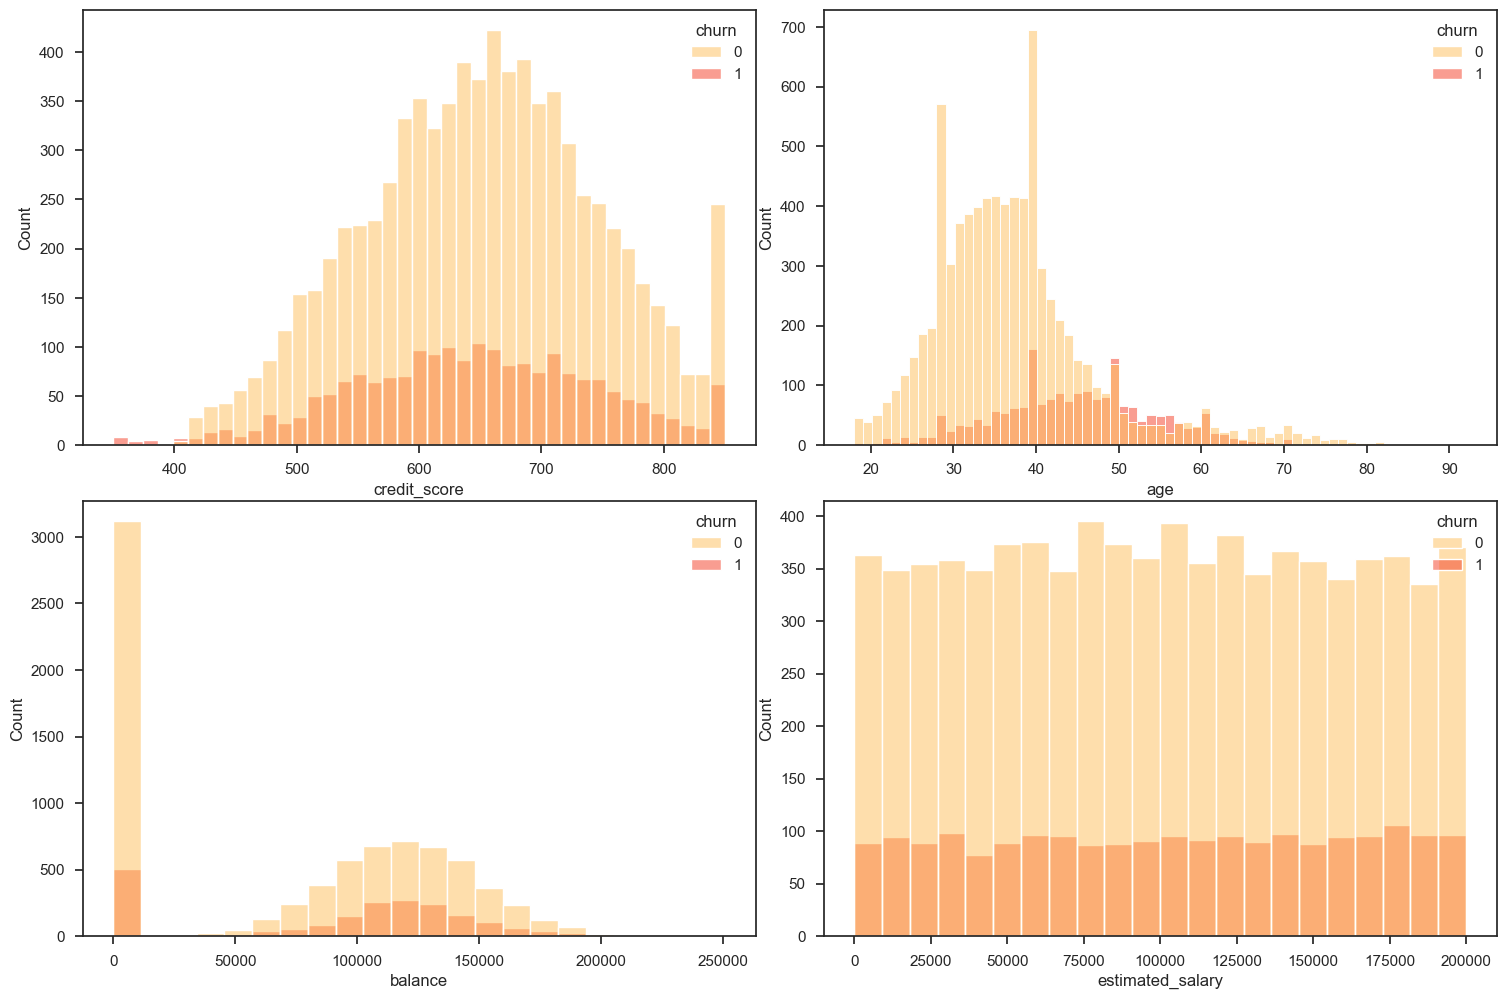

In [556]:
# Gráficos de acordo para verificar a distribuição de churn e não churn de acordo com algumas variáveis
janela, graficos = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
plt.tight_layout()

sns.set_theme(style="ticks")
sns.histplot(data = df, x = 'credit_score',hue = 'churn',ax=graficos[0][0],palette='YlOrRd',)
sns.histplot(data = df, x = 'age',hue = 'churn',ax=graficos[0][1],palette='YlOrRd')
sns.histplot(data = df, x = 'balance',hue = 'churn',ax=graficos[1][0],palette='YlOrRd')
sns.histplot(data = df, x = 'estimated_salary',hue = 'churn',ax=graficos[1][1],palette='YlOrRd');

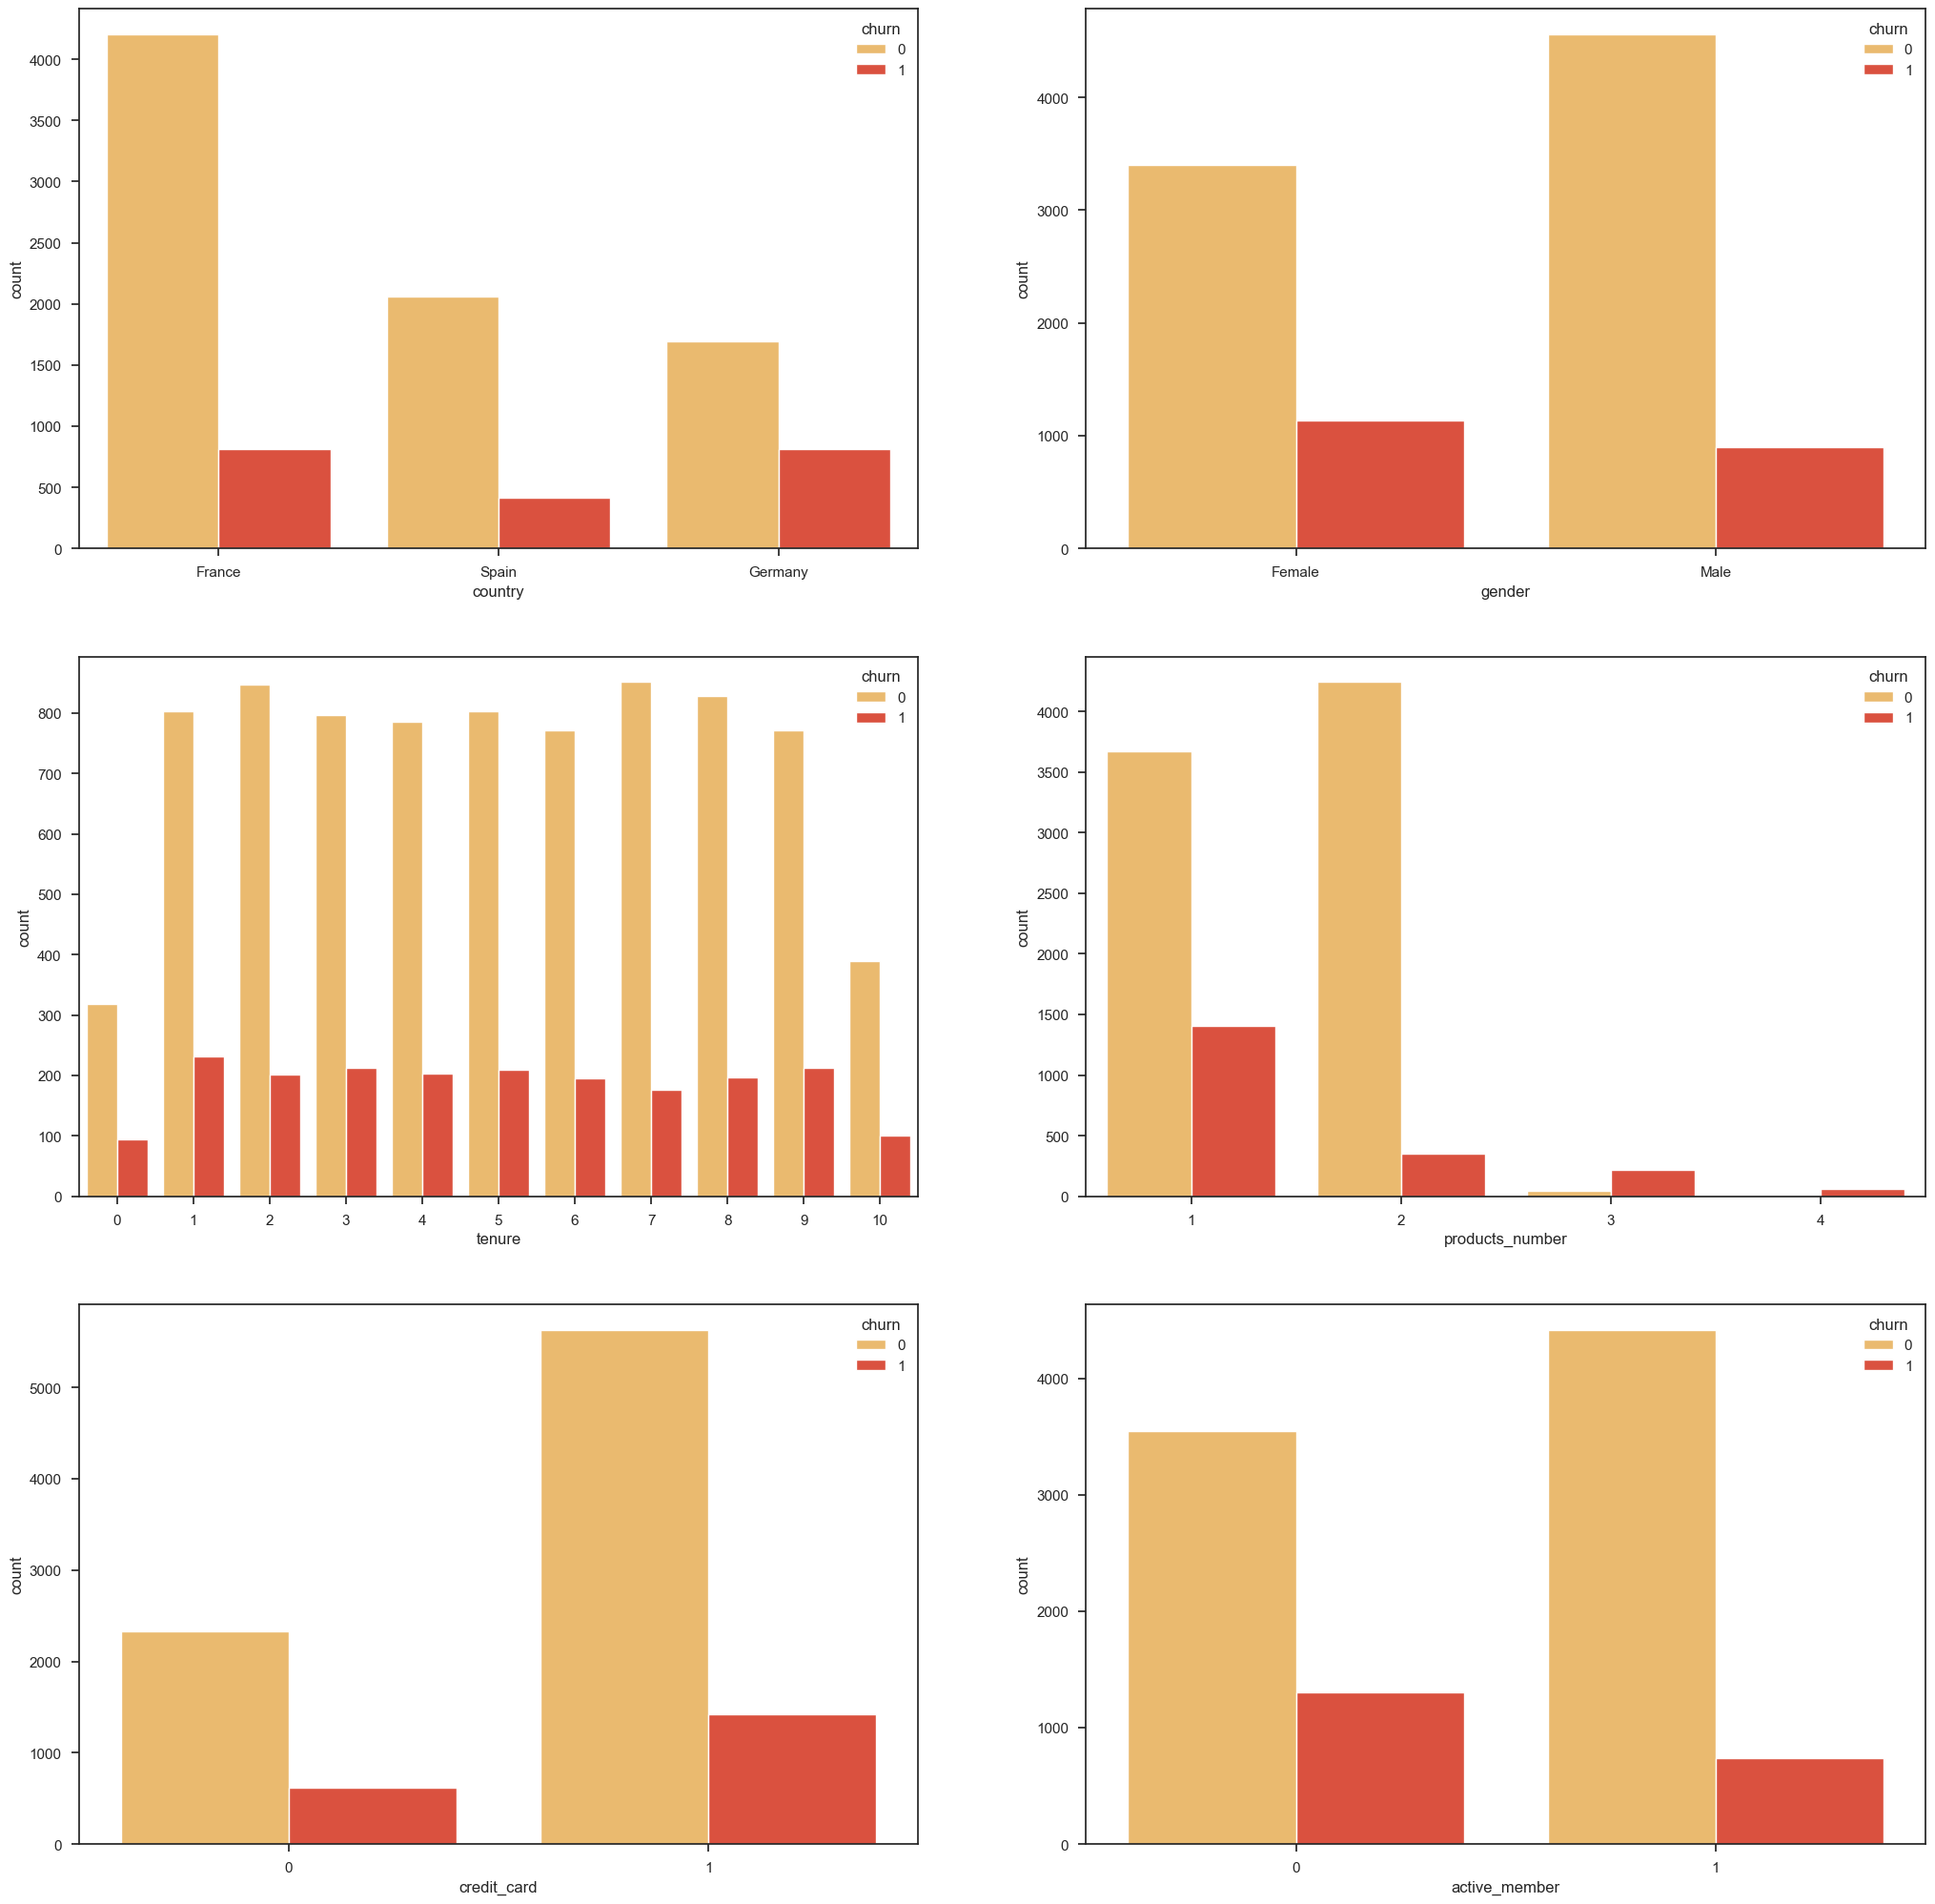

In [554]:
# Gráficos de acordo para verificar a distribuição de churn e não churn de acordo com as variáveis restantes
janela, graficos = plt.subplots(nrows=3, ncols=2, figsize=(25,25))

sns.countplot(x = 'country', data = df,palette='YlOrRd',hue = 'churn',ax=graficos[0][0])
sns.countplot(x = 'gender',  data = df,palette='YlOrRd',hue = 'churn',ax=graficos[0][1])
sns.countplot(x = 'tenure',  data = df,palette='YlOrRd',hue = 'churn',ax=graficos[1][0])
sns.countplot(x = 'products_number',  data = df,palette='YlOrRd',hue = 'churn',ax=graficos[1][1])
sns.countplot(x = 'credit_card',  data = df,palette='YlOrRd',hue = 'churn',ax=graficos[2][0])
sns.countplot(x = 'active_member', data = df,palette='YlOrRd',hue = 'churn',ax=graficos[2][1]);


<Axes: >

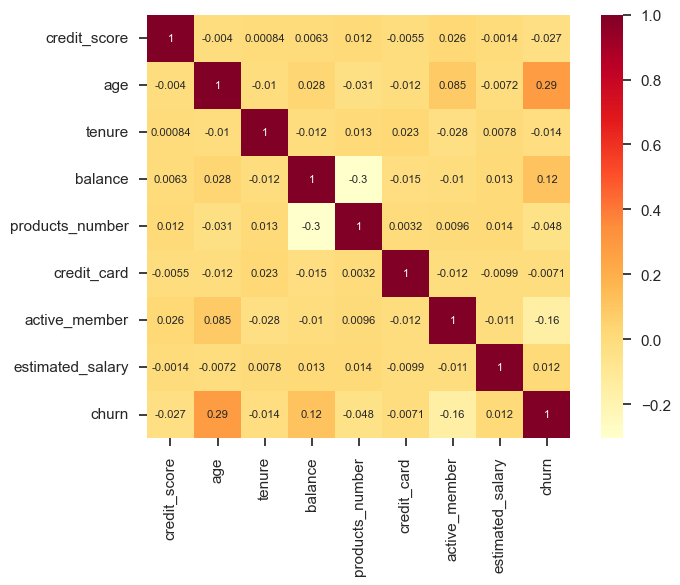

In [453]:
# Criando um gráfico para verificar a correlação das varíaveis
sns.heatmap(df.corr(),annot = True,annot_kws={"size": 8}, cmap= 'YlOrRd',square=True)

De acordo com o gráfico, podemos concluir que as mais correlacionadas com o Churn são Age(Idade) e Balance(Saldo)

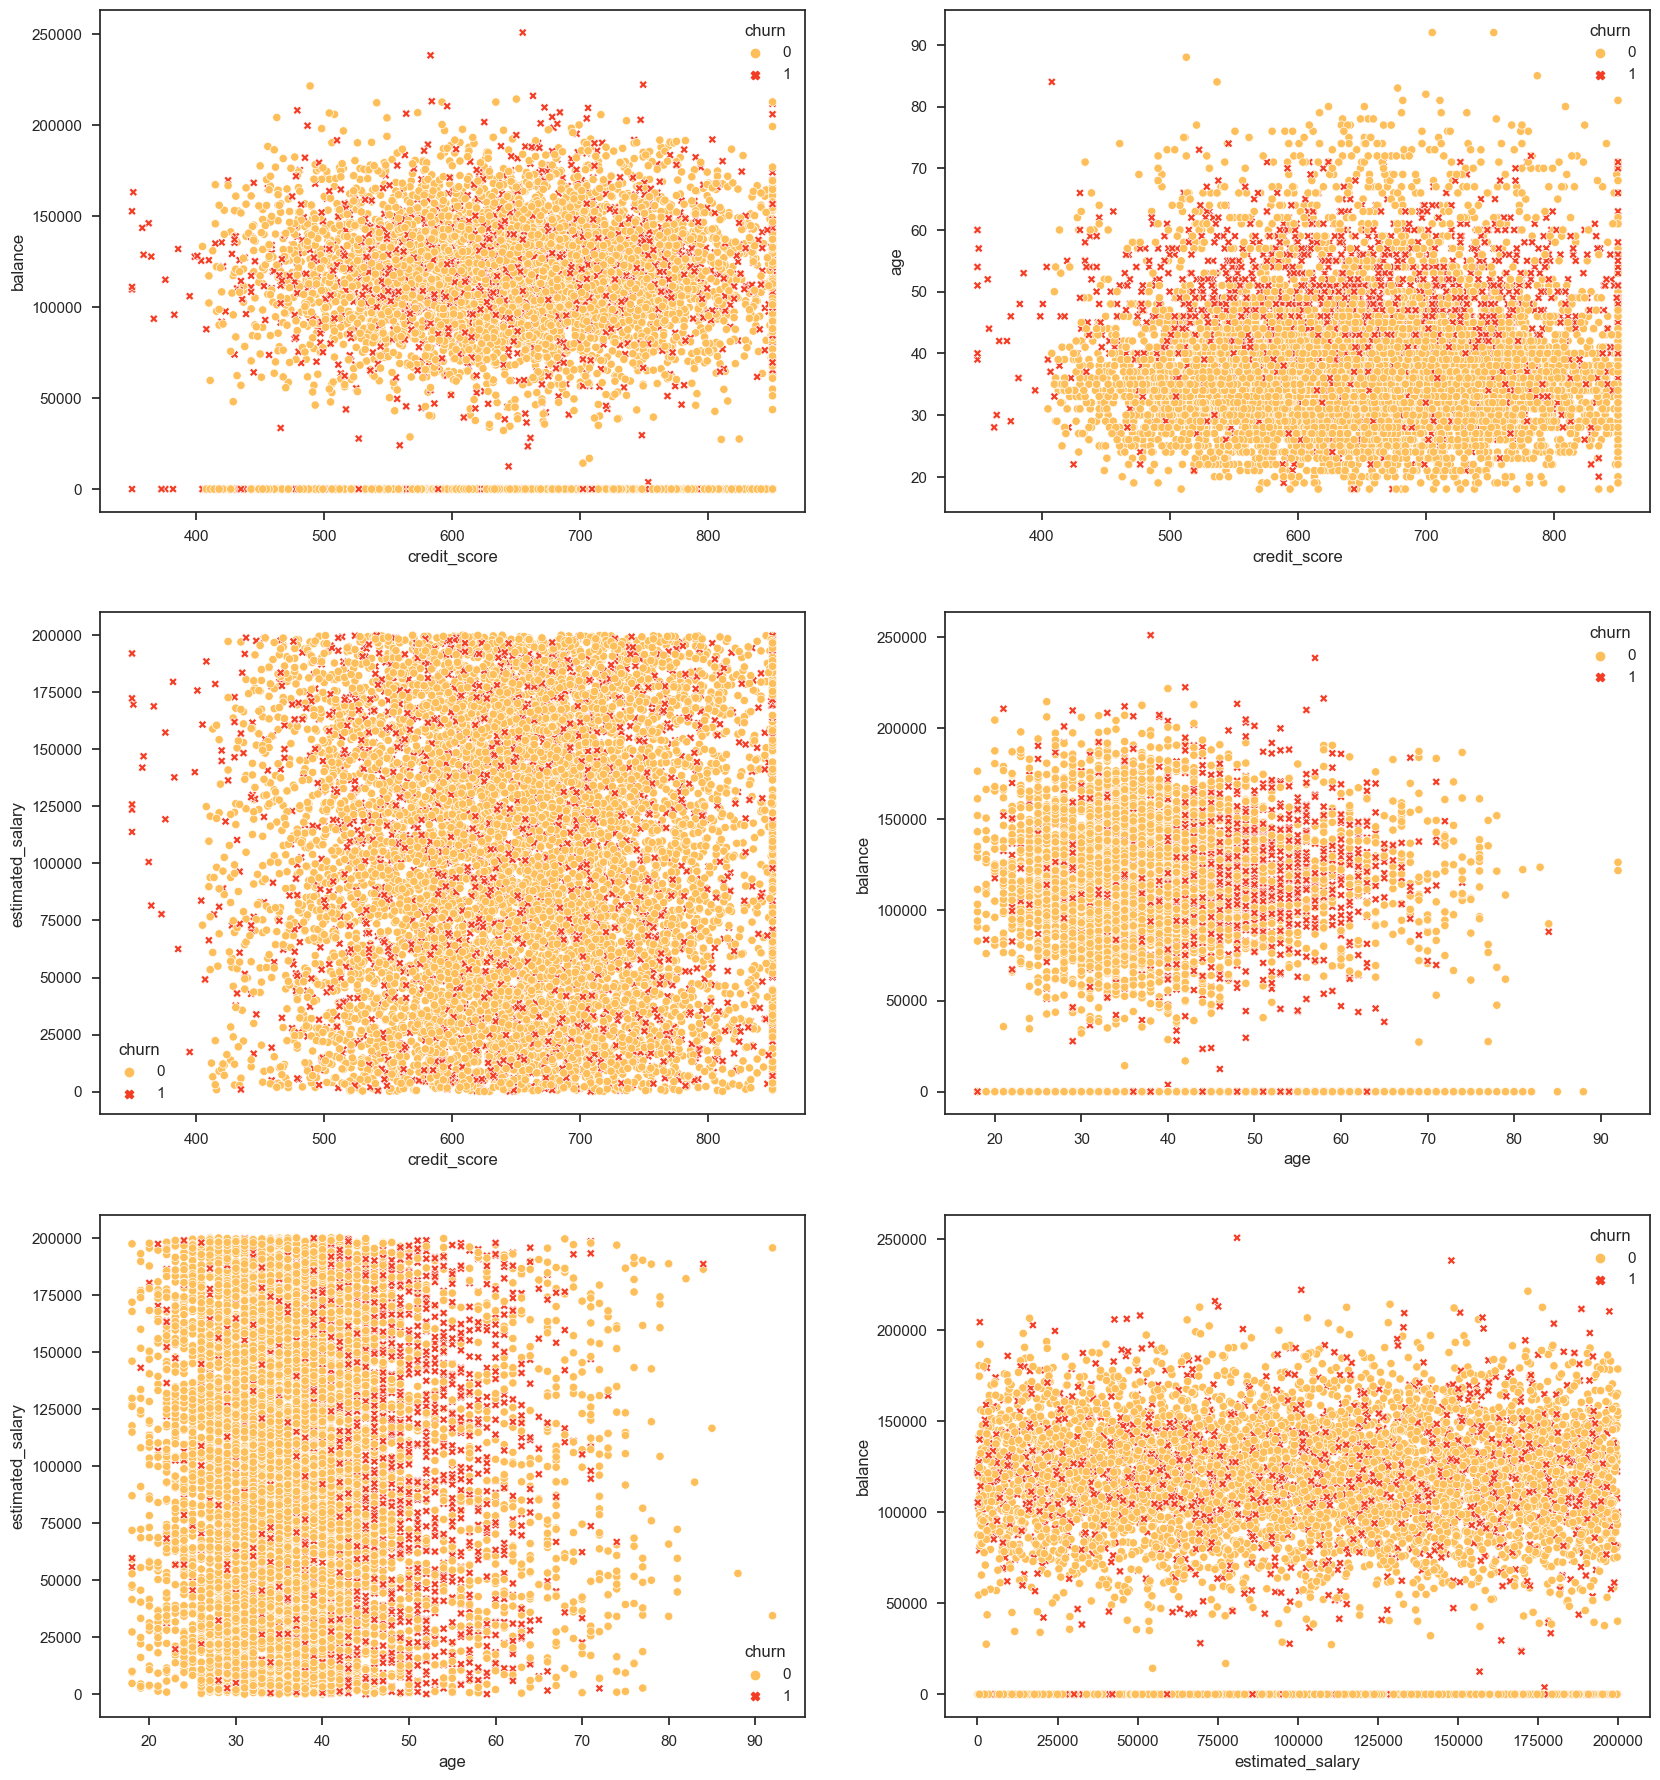

In [557]:
# Criando um gráfico para verificar a dispensão das varíaveis
plt.figure(figsize = (20,30))

plt.subplot(4,2,1)
sns.scatterplot(x = "credit_score", y = "balance", hue = "churn",style = 'churn', data = df, palette = 'YlOrRd')

plt.subplot(4,2,2)
sns.scatterplot(x = "credit_score", y = "age", hue = "churn",style = 'churn', data = df, palette = 'YlOrRd')

plt.subplot(4,2,3)
sns.scatterplot(x = "credit_score", y = "estimated_salary", hue = "churn",style = 'churn', data = df, palette = 'YlOrRd')

plt.subplot(4,2,4)
sns.scatterplot(x = "age", y = "balance", hue = "churn",style = 'churn', data = df, palette = 'YlOrRd')

plt.subplot(4,2,5)
sns.scatterplot(x = "age", y = "estimated_salary", hue = "churn",style = 'churn', data = df, palette = 'YlOrRd')

plt.subplot(4,2,6)
sns.scatterplot(x = "estimated_salary", y = "balance", hue = "churn",style = 'churn', data = df, palette = 'YlOrRd');


## Dividindo a base de dados

Para a criação do algoritmo vamos dividir nossa base de dados em duas sendo x e y, onde x são as variáveis que vão nos ajudar a prever o churn e y é o churn que desejamos descobrir

In [11]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [577]:
# Dividindo a Base de Dados
x = df.iloc[:, 0:10].values
y = df.iloc[:, 10].values
print('Variáveis de x: ',x[0])
print('Variáveis de y:', y[0])

Variáveis de x:  [619 'France' 'Female' 42 2 0.0 1 1 1 101348.88]
Variáveis de y: 1


In [578]:
# Escolhendo amostras aleatoriamente com reposição
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(random_state=0)
x, y = os.fit_resample(x, y)
x,y

(array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
        [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
        [502, 'France', 'Female', ..., 1, 0, 113931.57],
        ...,
        [565, 'Germany', 'Male', ..., 1, 0, 175070.94],
        [553, 'Spain', 'Female', ..., 0, 1, 30730.95],
        [492, 'France', 'Female', ..., 1, 1, 182865.09]], dtype=object),
 array([1, 0, 1, ..., 1, 1, 1], dtype=int64))

# Tratando de atributos categóricos

Para o algoritmo, devemos tratar os nossos dados categóricos, por exemplo, "country" e "gender". Devemos transforma-los em variáveis quantitativas

In [187]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [579]:
# Transformando as variáveis
from sklearn.preprocessing import LabelEncoder
label_encoder_country = LabelEncoder()
label_encoder_gender = LabelEncoder()


x[:,1] = label_encoder_country.fit_transform(x[:,1])
x[:,2] = label_encoder_gender.fit_transform(x[:,2])

In [583]:
# Mostrando como ficou nossas variáveis
x[0]

array([619, 0, 0, 42, 2, 0.0, 1, 1, 1, 101348.88], dtype=object)

# Padronizando a base de dados

A partir de agora, terei uma novas base de dados que será "X_scaler", esta base de dados foi criada a partir de uma padronização para que o meu algoritmo não determine que um número é mais relevante que o outro, por exemplo, a variável genero agora é 0(Feminino) e 1(Masculino), a padronização foi feita para o algoritmo não supor que 1 é melhor que 0 ou inversamente.

In [584]:
# Padronização
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [19]:
# Verificando como ficou a nova base de dados
x_scaler[0]

array([-0.29877723, -0.95773012, -1.01799435,  0.08418894, -1.01840607,
       -1.33103279, -0.75606167,  0.6512495 ,  1.08223556,  0.00817382])

## Separando a Base de Treinamento e de Teste

Agora, separarei nossas bases de dados em base para treinamento e base para teste. Onde a base de treinamento terá 75% da base de dados e a base de teste terá 25%. Porém, farei isto com a base de dados normal e a base de dados que foi padronizada anteriormente

In [20]:
# Separando as bases de dados
from sklearn.model_selection import train_test_split
x_treinamento, x_teste,y_treinamento,  y_teste = train_test_split(x,y, test_size = 0.25,random_state = 42)
x_scaler_treinamento,x_scaler_teste,y_scaler_treinamento,  y_scaler_teste = train_test_split(x_scaler,y, test_size = 0.25,random_state = 42)

In [22]:
# Verificando a quantidade de linha e coluna da base de treinamento normal
x_treinamento.shape, y_treinamento.shape

((11944, 10), (11944,))

In [23]:
# Verificando a quantidade de linha e coluna da base de teste normal
x_teste.shape, y_teste.shape

((3982, 10), (3982,))

In [24]:
# Verificando a quantidade de linha e coluna da base de treinamento padronizada
x_scaler_treinamento.shape, y_scaler_treinamento.shape

((11944, 10), (11944,))

In [25]:
# Verificando a quantidade de linha e coluna da base de teste padronizada
x_scaler_teste.shape, y_scaler_teste.shape

((3982, 10), (3982,))

In [26]:
# Diferença entre a base de dados normal e padronizada
x_treinamento[0], x_scaler_treinamento[0]

(array([610, 1, 1, 50, 1, 113957.01, 2, 1, 0, 196526.55], dtype=object),
 array([-0.39009988,  0.29383383,  0.98232373,  0.84031081, -1.36135608,
         0.5229727 ,  0.72627714,  0.6512495 , -0.92401325,  1.66148209]))

## Descobrindo melhores parâmetros para cada algoritmo

Testarei alguns algoritmos a fim de descobrir qual o melhor para minha base de dados e afim de combinar os melhores. Para isso, terei que descobrir quais são os melhores parâmetros para cada algoritmo

### Parâmetros para Random Forest

In [27]:
# Definindo os parâmetros
parametros_random = {'criterion': ['gini','entropy'],
              'n_estimators': [10,40,100,150],
              'min_samples_split':[2,5,10],
              'min_samples_leaf': [1,5,10]
             }


In [28]:
# Verificando quais são os melhores e qual seu nível de precisão para base normal
gridsearch_random = GridSearchCV(estimator=RandomForestClassifier(),param_grid=parametros_random)
gridsearch_random.fit(x,y)
melhores_parametros_random = gridsearch_random.best_params_
melhor_resultado_random = gridsearch_random.best_score_
print(f"Os melhores parâmetros são: {melhores_parametros_random}")
print(f'Poderá ter cerca de: {melhor_resultado_random} de accuracy') 

Os melhores parâmetros são: {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Poderá ter cerca de: 0.9566121995661947 de accuracy


In [29]:
# Verificando quais são os melhores e qual seu nível de precisão para base padronizada
gridsearch_random_scaler = GridSearchCV(estimator=RandomForestClassifier(),param_grid=parametros_random)
gridsearch_random_scaler.fit(x_scaler,y)
melhores_parametros_random_scaler = gridsearch_random_scaler.best_params_
melhor_resultado_random_scaler = gridsearch_random_scaler.best_score_
print(f"Os melhores parâmetros são: {melhores_parametros_random_scaler}")
print(f"Poderá ter cerca de: {melhor_resultado_random_scaler} de accuracy") 

Os melhores parâmetros são: {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Poderá ter cerca de: 0.956549208123058 de accuracy


### Parâmetros para KNN

In [30]:
# Definindo os parâmetros
parametros_knn = {'n_neighbors': [1,3,5,10,20],
              'p': [1,2]}

In [31]:
# Verificando quais são os melhores e qual seu nível de precisão para base normal
gridsearch_knn = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=parametros_knn)
gridsearch_knn.fit(x,y)
melhoresparametros_knn = gridsearch_knn.best_params_
melhorresultado_knn = gridsearch_knn.best_score_
print(f"Os melhores parâmetros são: {melhoresparametros_knn}")
print(f"Poderá ter cerca de: {melhorresultado_knn} de accuracy") 

Os melhores parâmetros são: {'n_neighbors': 1, 'p': 1}
Poderá ter cerca de: 0.8797565092964609 de accuracy


In [32]:
# Verificando quais são os melhores e qual seu nível de precisão para base padronizada

gridsearch_knn_scaler = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=parametros_knn)
gridsearch_knn_scaler.fit(x_scaler,y)
melhoresparametros_knn_scaler = gridsearch_knn_scaler.best_params_
melhorresultado_knn_scaler = gridsearch_knn_scaler.best_score_
print(f"Os melhores parâmetros são: {melhoresparametros_knn_scaler}")
print(f"Poderá ter cerca de: {melhorresultado_knn_scaler} de accuracy") 

Os melhores parâmetros são: {'n_neighbors': 1, 'p': 1}
Poderá ter cerca de: 0.9244005120518437 de accuracy


### Parâmetros para Regressão Logistica

In [33]:
# Definindo os parâmetros
parametro_rl = {'tol': [0.0001,0.00001,0.000001],
              'C': [1.0,1.5,2.0],
              'solver': ['lbfgs','sag','saga']}

In [34]:
# Verificando quais são os melhores e qual seu nível de precisão para base normal
gridsearch_rl = GridSearchCV(estimator=LogisticRegression(),param_grid=parametro_rl)
gridsearch_rl.fit(x,y)
melhoresparametros_rl = gridsearch_rl.best_params_
melhorresultado_rl = gridsearch_rl.best_score_
print(f"Os melhores parâmetros são: {melhoresparametros_rl}")
print(f"Poderá ter cerca de: {melhorresultado_rl} de accuracy") 

Os melhores parâmetros são: {'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
Poderá ter cerca de: 0.6603038607881222 de accuracy


In [35]:
# Verificando quais são os melhores e qual seu nível de precisão para base padronizada
gridsearch_rl_scaler = GridSearchCV(estimator=LogisticRegression(),param_grid=parametro_rl)
gridsearch_rl_scaler.fit(x_scaler,y)
melhoresparametros_rl_scaler = gridsearch_rl_scaler.best_params_
melhorresultado_rl_scaler = gridsearch_rl_scaler.best_score_
print(f"Os melhores parâmetros são: {melhoresparametros_rl_scaler}")
print(f"Poderá ter cerca de: {melhorresultado_rl_scaler} de accuracy") 

Os melhores parâmetros são: {'C': 1.5, 'solver': 'sag', 'tol': 0.0001}
Poderá ter cerca de: 0.6923890135512412 de accuracy


### Parâmetros para Redes Neurais

In [36]:
# Definindo os parâmetros
parametros_redes = {'activation': ['relu','logistic','tahn'],
              'solver': ['adam','sgd'],
              'batch_size': [10,56],
              'max_iter': [200,500,1000]
             }

In [37]:
# Verificando quais são os melhores e qual seu nível de precisão para base normal
gridsearch_redes = GridSearchCV(estimator=MLPClassifier(),param_grid=parametros_redes)
gridsearch_redes.fit(x,y)
melhoresparametros_redes = gridsearch_redes.best_params_
melhorresultado_redes = gridsearch_redes.best_score_
print(f"Os melhores parâmetros são: {melhoresparametros_redes}")
print(f"Poderá ter cerca de: {melhorresultado_redes} de accuracy") 

Os melhores parâmetros são: {'activation': 'relu', 'batch_size': 56, 'max_iter': 1000, 'solver': 'adam'}
Poderá ter cerca de: 0.577233875442108 de accuracy


# Treinando os modelos

Após descobrirmos quais são os melhores parâmetros para cada algoritmo, iremos aplica-los à nossa base de dados de treinamento

## Naive Bayes

### Base de Dados Normal

In [28]:
# Treinando o algoritmo com a base normal
naive_bayes = GaussianNB()
naive_bayes.fit(x_treinamento,y_treinamento)

GaussianNB()

In [29]:
# Verificando qual é a previsão do meu algoritmo
previsoes_naive = naive_bayes.predict(x_teste)
previsoes_naive

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [30]:
# Verificando quais são os resultados reais
y_teste

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [31]:
# Precisão do algoritmo
accuracy_naive = accuracy_score(y_teste,previsoes_naive)
accuracy_naive

0.6911099949773983

0.6911099949773983

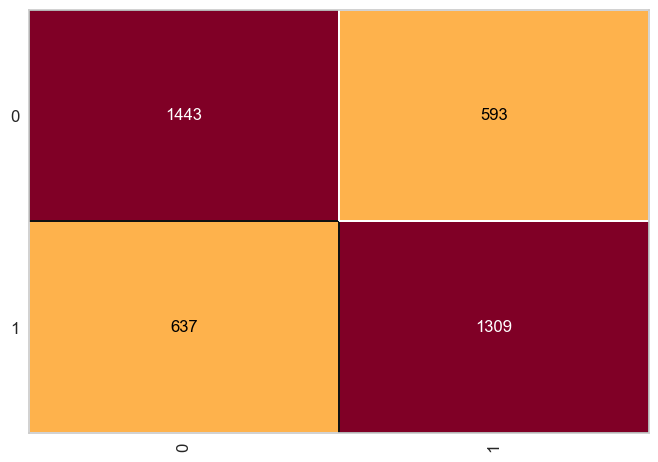

In [32]:
# Matriz de Confusão do Algoritmo
cm_naive = ConfusionMatrix(naive_bayes)
cm_naive.fit(x_treinamento,y_treinamento)
cm_naive.score(x_teste,y_teste)

In [33]:
# Descrição do algoritmo
print(classification_report(y_teste,previsoes_naive))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70      2036
           1       0.69      0.67      0.68      1946

    accuracy                           0.69      3982
   macro avg       0.69      0.69      0.69      3982
weighted avg       0.69      0.69      0.69      3982



### Base de Dados Padronizada

In [34]:
# Treinando o algoritmo com a base padronizada
naive_bayes_scaler = GaussianNB()
naive_bayes_scaler.fit(x_scaler_treinamento,y_scaler_treinamento)

GaussianNB()

In [35]:
# Verificando qual é a previsão do meu algoritmo
previsoes_naive_scaler = naive_bayes_scaler.predict(x_scaler_teste)
previsoes_naive_scaler

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [36]:
# Verificando quais são os resultados reais
y_scaler_teste

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [37]:
# Precisão do algoritmo
accuracy_naive_scaler = accuracy_score(y_scaler_teste,previsoes_naive_scaler)
accuracy_naive_scaler

0.735811150175791

0.735811150175791

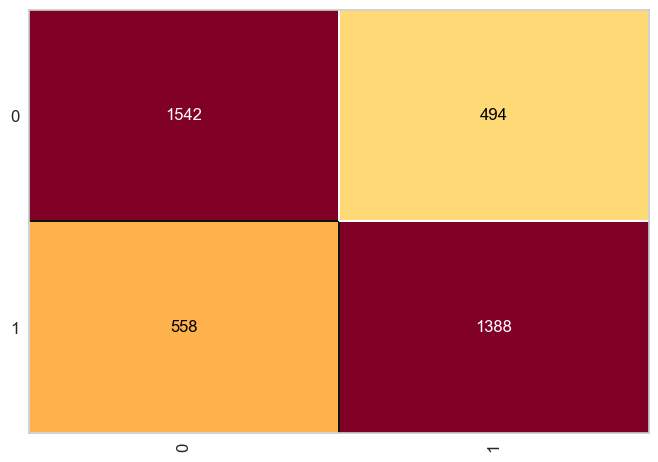

In [38]:
# Matriz de Confusão do Algoritmo
cm_naive = ConfusionMatrix(naive_bayes_scaler)
cm_naive.fit(x_scaler_treinamento,y_scaler_treinamento)
cm_naive.score(x_scaler_teste,y_scaler_teste)

In [39]:
# Descrição do algoritmo
print(classification_report(y_scaler_teste,previsoes_naive_scaler))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75      2036
           1       0.74      0.71      0.73      1946

    accuracy                           0.74      3982
   macro avg       0.74      0.74      0.74      3982
weighted avg       0.74      0.74      0.74      3982



## Random Forest

### Base de Dados Normal

In [40]:
# Treinando o algoritmo com a base normal
random_forest = RandomForestClassifier(criterion= 'entropy', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 40)
random_forest.fit(x_treinamento,y_treinamento)

RandomForestClassifier(criterion='entropy', n_estimators=40)

In [41]:
# Verificando qual é a previsão do meu algoritmo
previsoes_random_forest = random_forest.predict(x_teste)
previsoes_random_forest

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [42]:
# Verificando quais são os resultados reais
y_teste

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [43]:
# Precisão do algoritmo
accuracy_random_forest = accuracy_score(y_teste,previsoes_random_forest)
accuracy_random_forest

0.9414866901054746

0.9414866901054746

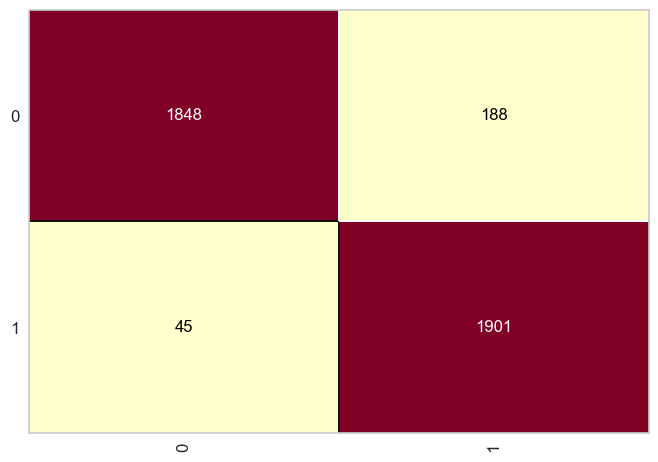

In [44]:
# Matriz de Confusão do Algoritmo
cm = ConfusionMatrix(random_forest)
cm.fit(x_treinamento,y_treinamento)
cm.score(x_teste,y_teste)

In [45]:
# Descrição do algoritmo
print(classification_report(y_teste,previsoes_random_forest))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      2036
           1       0.91      0.98      0.94      1946

    accuracy                           0.94      3982
   macro avg       0.94      0.94      0.94      3982
weighted avg       0.94      0.94      0.94      3982



### Base de Dados Padronizada

In [46]:
# Treinando o algoritmo com a base normal
random_forest_scaler = RandomForestClassifier(criterion= 'gini', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 150)
random_forest_scaler.fit(x_scaler_treinamento,y_scaler_treinamento)

RandomForestClassifier(n_estimators=150)

In [47]:
# Verificando qual é a previsão do meu algoritmo
previsoes_random_forest_scaler = random_forest_scaler.predict(x_scaler_teste)
previsoes_random_forest_scaler

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [48]:
# Verificando quais são os resultados reais
y_scaler_teste

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [49]:
# Matriz de Confusão do Algoritmo
accuracy_random_forest_scaler = accuracy_score(y_scaler_teste,previsoes_random_forest_scaler)
accuracy_random_forest_scaler

0.9412355600200905

0.9412355600200905

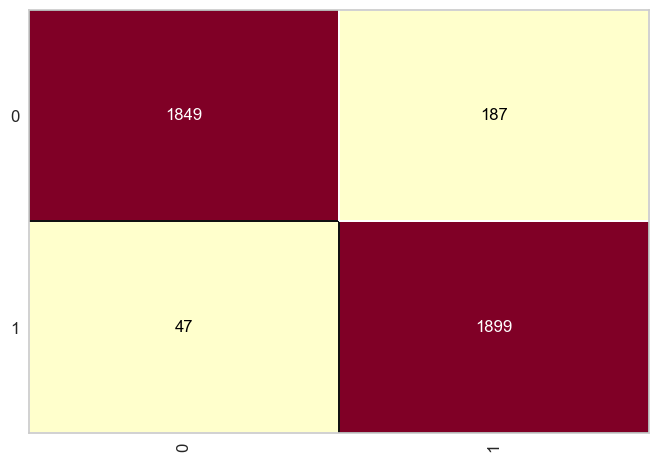

In [50]:
# Matriz de Confusão do Algoritmo
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_scaler)
cm.fit(x_scaler_treinamento,y_scaler_treinamento)
cm.score(x_scaler_teste,y_scaler_teste)

In [51]:
# Descrição do algoritmo
print(classification_report(y_scaler_teste,previsoes_random_forest_scaler))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      2036
           1       0.91      0.98      0.94      1946

    accuracy                           0.94      3982
   macro avg       0.94      0.94      0.94      3982
weighted avg       0.94      0.94      0.94      3982



## KNN

### Base de Dados Normal

In [52]:
# Treinando o algoritmo com a base normal
knn = KNeighborsClassifier(n_neighbors = 1, p = 1)
knn.fit(x_treinamento,y_treinamento)

KNeighborsClassifier(n_neighbors=1, p=1)

In [53]:
# Verificando qual é a previsão do meu algoritmo
previsoes_knn = knn.predict(x_teste)
previsoes_knn

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [54]:
# Verificando quais são os resultados reais
y_teste

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [55]:
# Precisão do algoritmo
accuracy_knn =accuracy_score(y_teste,previsoes_knn)
accuracy_knn

0.8588648920140632

0.8588648920140632

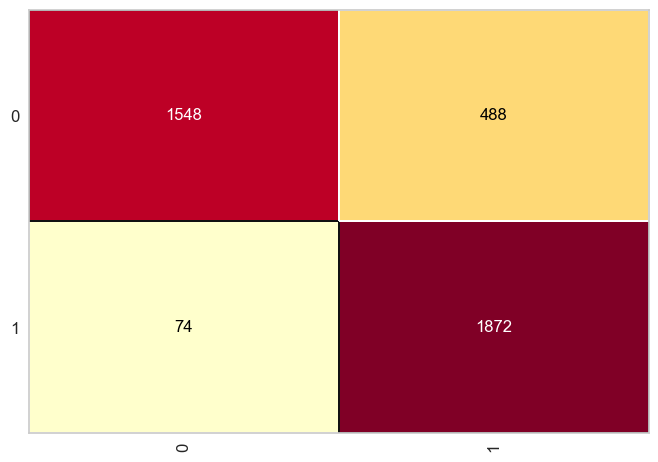

In [56]:
# Matriz de Confusão do Algoritmo
MatrixConfusao = ConfusionMatrix(knn)
MatrixConfusao.fit(x_treinamento,y_treinamento)
MatrixConfusao.score(x_teste,y_teste)

In [57]:
# Descrição do algoritmo
print(classification_report(y_teste,previsoes_knn))

              precision    recall  f1-score   support

           0       0.95      0.76      0.85      2036
           1       0.79      0.96      0.87      1946

    accuracy                           0.86      3982
   macro avg       0.87      0.86      0.86      3982
weighted avg       0.88      0.86      0.86      3982



### Base de Dados Padronizada

In [155]:
# Treinando o algoritmo com a base padronizada
knn_scaler = KNeighborsClassifier(n_neighbors = 1, p = 1)
knn_scaler.fit(x_scaler_treinamento,y_scaler_treinamento)

KNeighborsClassifier(n_neighbors=1, p=1)

In [156]:
# Verificando qual é a previsão do meu algoritmo
previsoes_knn_scaler = knn_scaler.predict(x_scaler_teste)
previsoes_knn_scaler

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [157]:
# Verificando quais são os resultados reais
y_scaler_teste

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [158]:
# Precisão do algoritmo
accuracy_knn_scaler = accuracy_score(y_scaler_teste,previsoes_knn_scaler)
accuracy_knn_scaler

0.9131089904570567

0.9131089904570567

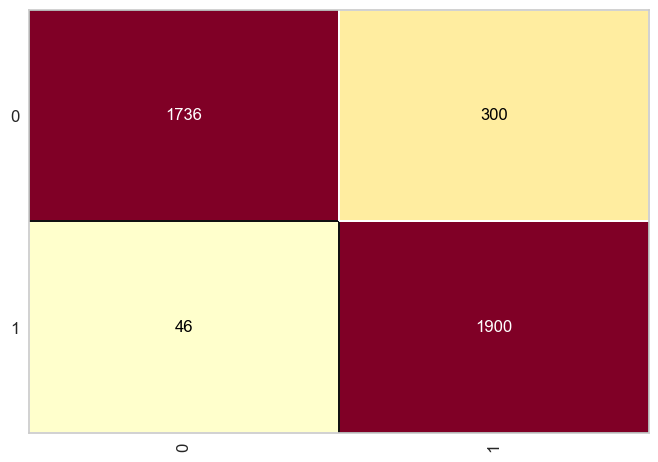

In [62]:
# Matriz de Confusão do Algoritmo
MatrixConfusao = ConfusionMatrix(knn_scaler)
MatrixConfusao.fit(x_scaler_treinamento,y_scaler_treinamento)
MatrixConfusao.score(x_scaler_teste,y_scaler_teste)

In [63]:
# Descrição do algoritmo
print(classification_report(y_scaler_teste,previsoes_knn_scaler))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      2036
           1       0.86      0.98      0.92      1946

    accuracy                           0.91      3982
   macro avg       0.92      0.91      0.91      3982
weighted avg       0.92      0.91      0.91      3982



## Regressão Logistica

### Base de Dados Normal

In [64]:
# Treinando o algoritmo com a base normal
regressão_logistica = LogisticRegression(C = 1.0, solver= 'lbfgs', tol= 0.0001)
regressão_logistica.fit(x_treinamento,y_treinamento)

LogisticRegression()

In [65]:
# Verificando qual é a previsão do meu algoritmo
previsoes_rl = regressão_logistica.predict(x_teste)
previsoes_rl

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [66]:
# Verificando quais são os resultados reais
y_teste

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [67]:
# Precisão do algoritmo
accuracy_regressão = accuracy_score(y_teste,previsoes_rl)
accuracy_regressão

0.6499246609743847

0.6499246609743847

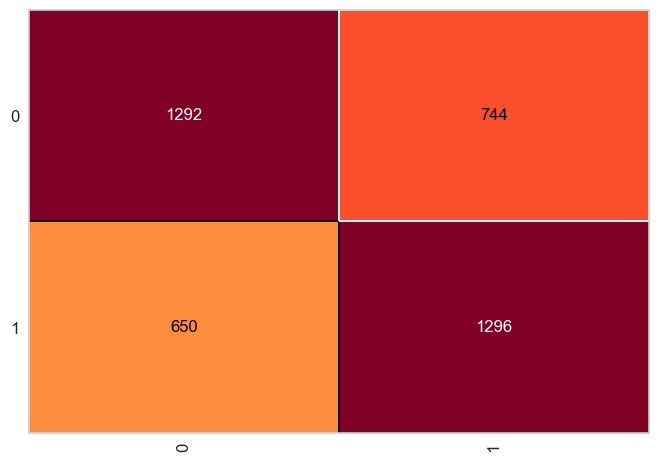

In [68]:
# Matriz de Confusão do Algoritmo
cm = ConfusionMatrix(regressão_logistica)
cm.fit(x_treinamento,y_treinamento)
cm.score(x_teste,y_teste)

In [69]:
# Descrição do algoritmo
print(classification_report(y_teste,previsoes_rl))

              precision    recall  f1-score   support

           0       0.67      0.63      0.65      2036
           1       0.64      0.67      0.65      1946

    accuracy                           0.65      3982
   macro avg       0.65      0.65      0.65      3982
weighted avg       0.65      0.65      0.65      3982



### Base de Dados Padronizada

In [70]:
# Treinando o algoritmo com a base padronizada
regressão_logistica_scaler = LogisticRegression(C = 1.0, solver= 'saga', tol= 0.0001)
regressão_logistica_scaler.fit(x_scaler_treinamento,y_scaler_treinamento)

LogisticRegression(solver='saga')

In [71]:
# Verificando qual é a previsão do meu algoritmo
previsoes_rl_scaler = regressão_logistica_scaler.predict(x_scaler_teste)
previsoes_rl_scaler

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [72]:
# Precisão do algoritmo
y_scaler_teste

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [73]:
accuracy_regressão_scaler = accuracy_score(y_scaler_teste,previsoes_rl_scaler)
accuracy_regressão_scaler

0.6916122551481667

0.6916122551481667

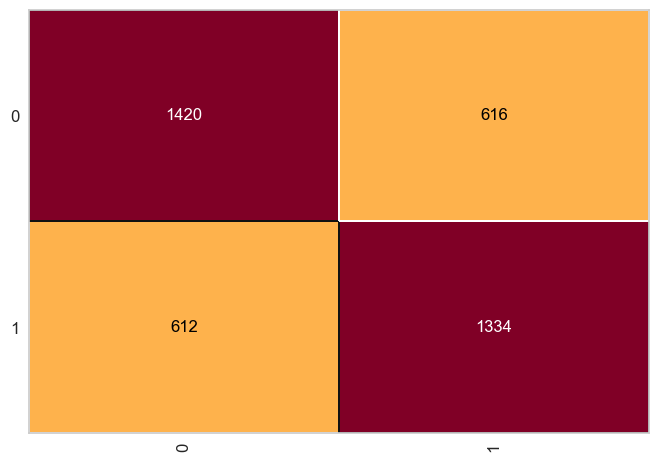

In [74]:
# Matriz de Confusão do Algoritmo
cm = ConfusionMatrix(regressão_logistica_scaler)
cm.fit(x_scaler_treinamento,y_scaler_treinamento)
cm.score(x_scaler_teste,y_scaler_teste)

In [75]:
# Descrição do algoritmo
print(classification_report(y_scaler_teste,previsoes_rl_scaler))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      2036
           1       0.68      0.69      0.68      1946

    accuracy                           0.69      3982
   macro avg       0.69      0.69      0.69      3982
weighted avg       0.69      0.69      0.69      3982



## Redes Neurais

### Base de Dados Normal

In [76]:
# Treinando o algoritmo com a base normal
redes_neurais = MLPClassifier(activation= 'relu', batch_size= 56, max_iter=1000, solver= 'adam')
redes_neurais.fit(x_treinamento,y_treinamento)

MLPClassifier(batch_size=56, max_iter=1000)

In [77]:
# Verificando qual é a previsão do meu algoritmo
previsoes_redes = redes_neurais.predict(x_teste)
previsoes_redes

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [78]:
# Verificando quais são os resultados reais
y_teste

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [79]:
# Precisão do algoritmo
accuracy_redes = accuracy_score(y_teste,previsoes_redes)
accuracy_redes

0.5637870416875942

0.5637870416875942

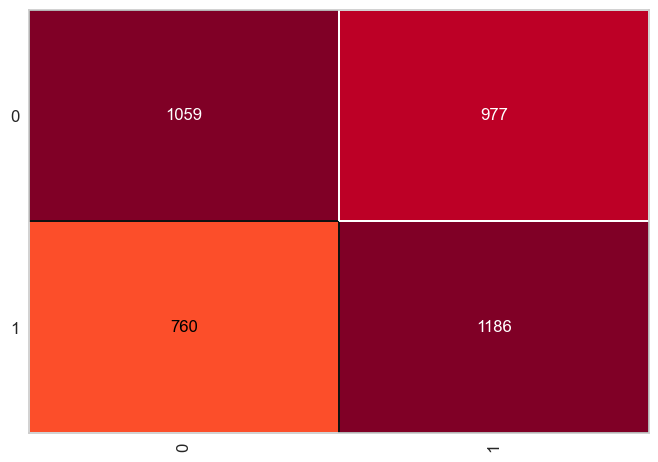

In [80]:
# Matriz de Confusão do Algoritmo
cm = ConfusionMatrix(redes_neurais)
cm.fit(x_treinamento,y_treinamento)
cm.score(x_teste,y_teste)


In [82]:
# Descrição do algoritmo
print(classification_report(y_teste,previsoes_redes))

              precision    recall  f1-score   support

           0       0.58      0.52      0.55      2036
           1       0.55      0.61      0.58      1946

    accuracy                           0.56      3982
   macro avg       0.57      0.56      0.56      3982
weighted avg       0.57      0.56      0.56      3982



## Base de Dados Padronizada

In [83]:
# Treinando o algoritmo com a base padronizada
redes_neurais_scaler = MLPClassifier(activation= 'relu', batch_size= 56, max_iter=1000, solver= 'adam')
redes_neurais_scaler.fit(x_scaler_treinamento,y_scaler_treinamento)

MLPClassifier(batch_size=56, max_iter=1000)

In [84]:
# Verificando qual é a previsão do meu algoritmo
previsoes_redes_scaler = redes_neurais_scaler.predict(x_scaler_teste)
previsoes_redes_scaler

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [85]:
# Verificando quais são os resultados reais
y_scaler_teste

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [86]:
# Precisão do algoritmo
accuracy_redes_scaler = accuracy_score(y_scaler_teste,previsoes_redes_scaler)
accuracy_redes_scaler

0.8194374686087393

0.8194374686087393

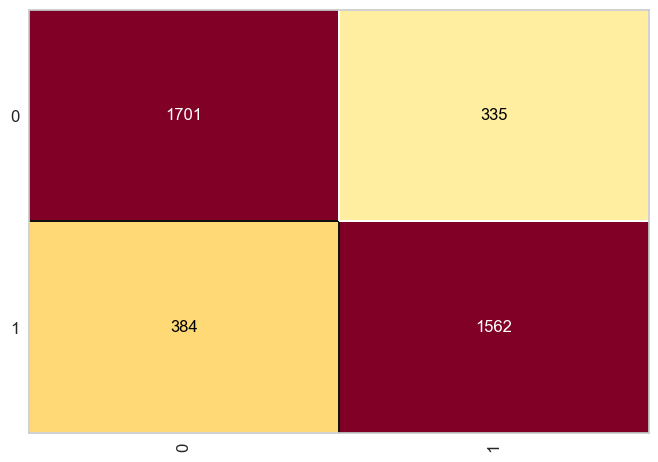

In [87]:
# Matriz de Confusão do Algoritmo
cm = ConfusionMatrix(redes_neurais_scaler)
cm.fit(x_scaler_treinamento,y_scaler_treinamento)
cm.score(x_scaler_teste,y_scaler_teste)


In [88]:
# Descrição do algoritmo
print(classification_report(y_scaler_teste,previsoes_redes_scaler))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      2036
           1       0.82      0.80      0.81      1946

    accuracy                           0.82      3982
   macro avg       0.82      0.82      0.82      3982
weighted avg       0.82      0.82      0.82      3982



## Avaliando Algoritmos

Após treinarmos os algoritmos, vamos avalia-los e ver qual o melhor para nossa base de dados tanto normal quanto padronizada

In [585]:
# Criando uma tabela com os algoritmos e a sua precisão
Algoritmos = pd.DataFrame({'Algoritmos': ['Naive Bayes','Naive Bayes Scaler',
                                          'Random Forest','Random Forest Scaler','KNN','KNN Scaler',
                                          'Regressão Logistica','Regressão Logistica Scaler',
                                          'Redes Neurais','Redes Neurais Scaler'],
                           'Accuracy': [accuracy_naive,accuracy_naive_scaler,
                                        accuracy_random_forest,accuracy_random_forest_scaler,
                                       accuracy_knn,accuracy_knn_scaler,
                                       accuracy_regressão,accuracy_regressão_scaler,
                                       accuracy_redes,accuracy_redes_scaler]
                           })
Algoritmos

,Algoritmos,Accuracy
0,Naive Bayes,0.691110
1,Naive Bayes Scaler,0.735811
2,Random Forest,0.941487
3,Random Forest Scaler,0.941236
4,KNN,0.858865
5,KNN Scaler,0.913109
6,Regressão Logistica,0.649925
7,Regressão Logistica Scaler,0.691612
8,Redes Neurais,0.563787
9,Redes Neurais Scaler,0.819437


Podemos verificar que os melhores algoritmos foram com as base de dados padronizadas, portando os algoritmos que serão utilizados serão: Random Forest Scaler, KNN Scaler, Redes Neurais Scaler

# Validação

Agora validaremos os nossos algoritmos

In [110]:
# Criando listas vazias
scores_random_scaler = []
scores_knn_scaler  = []
scores_redes_scaler = []

In [112]:
# Refazendo os algoritmos para verificar como se comportam de acordo com o random state
from sklearn.model_selection import cross_val_score,KFold
for i in range(15):
    print(i)
    k = KFold(n_splits=10,shuffle=True,random_state=i)
    random_scaler = RandomForestClassifier(criterion= 'gini', min_samples_leaf= 1, min_samples_split= 2, n_estimators= 150)
    scores = cross_val_score(random_scaler,x_scaler,y,cv= k)
    print(scores)
    print(scores.mean())
    scores_random_scaler.append(scores.mean())

0
[0.96359071 0.9566855  0.95354677 0.95794099 0.95794099 0.95919648
 0.96105528 0.95100503 0.9629397  0.96482412]
0.9588725564419713
1
[0.95291902 0.96233522 0.95291902 0.9648462  0.96045198 0.96107972
 0.96105528 0.95540201 0.96042714 0.95665829]
0.9588093874898661
2
[0.95982423 0.95982423 0.95543001 0.95919648 0.95417451 0.96359071
 0.95665829 0.95979899 0.95477387 0.95037688]
0.9573648215969996
3
[0.96359071 0.95731325 0.95856874 0.95982423 0.97175141 0.9566855
 0.95979899 0.96168342 0.96042714 0.95854271]
0.9608186096836979
4
[0.9566855  0.96045198 0.95103578 0.96045198 0.95919648 0.96296296
 0.95540201 0.95477387 0.95728643 0.96419598]
0.958244297444536
5
[0.95856874 0.95794099 0.95856874 0.9566855  0.95040804 0.95605775
 0.96733668 0.96042714 0.96231156 0.96545226]
0.9593757393369863
6
[0.95166353 0.9566855  0.96798493 0.95856874 0.96107972 0.95417451
 0.95728643 0.95728643 0.95288945 0.96984925]
0.958746849438656
7
[0.95794099 0.95605775 0.95794099 0.97049592 0.95354677 0.95480

In [111]:
# Refazendo os algoritmos para verificar como se comportam de acordo com o random state
for i in range(15):
    print(i)
    k = KFold(n_splits=10,shuffle=True,random_state=i)
    knn_scaler = KNeighborsClassifier(n_neighbors = 1, p = 1)
    scores = cross_val_score(knn_scaler,x_scaler,y,cv= k)
    print(scores)
    print(scores.mean())
    scores_knn_scaler.append(scores.mean())

0
[0.93596987 0.92655367 0.92027621 0.93785311 0.93345888 0.92906466
 0.93907035 0.92148241 0.94095477 0.93404523]
0.9318729160554813
1
[0.93157564 0.94036409 0.92404269 0.92843691 0.94224733 0.92529818
 0.93467337 0.92525126 0.92462312 0.93404523]
0.9310557811026255
2
[0.93157564 0.92467043 0.92341494 0.93345888 0.92404269 0.93032015
 0.9258794  0.93467337 0.94032663 0.93027638]
0.9298638515868737
3
[0.93345888 0.93534212 0.92780917 0.92718142 0.94350282 0.9309479
 0.93090452 0.93592965 0.93278894 0.92022613]
0.9318091556337873
4
[0.92592593 0.93157564 0.9296924  0.93157564 0.93722536 0.93032015
 0.92776382 0.93027638 0.94095477 0.93090452]
0.9316214626175447
5
[0.94287508 0.9296924  0.93157564 0.9391086  0.92843691 0.92404269
 0.9290201  0.92839196 0.93467337 0.9290201 ]
0.9316836852183075
6
[0.92341494 0.92718142 0.94224733 0.93345888 0.92906466 0.93534212
 0.9258794  0.92964824 0.93090452 0.94095477]
0.9318096288094585
7
[0.93408663 0.92780917 0.93408663 0.93471438 0.92718142 0.937

In [100]:
# Refazendo os algoritmos para verificar como se comportam de acordo com o random state
for i in range(15):
    print(i)
    k = KFold(n_splits=10,shuffle=True,random_state=i)
    rede_neural_scaler = MLPClassifier()
    scores = cross_val_score(rede_neural_scaler,x_scaler,y,cv= k)
    print(scores)
    print(scores.mean())
    scores_redes_scaler.append(scores.mean())

0
[0.80853735 0.80037665 0.80288763 0.81418707 0.81607031 0.82297552
 0.81030151 0.82223618 0.81155779 0.82474874]
0.8133878747157002
1
[0.80853735 0.83113622 0.80163214 0.83678594 0.82485876 0.81481481
 0.80213568 0.78957286 0.82035176 0.8241206 ]
0.8153946127372581
2
[0.82423101 0.81167608 0.80602637 0.80539862 0.79096045 0.8091651
 0.80967337 0.80778894 0.81344221 0.81721106]
0.8095573205008092
3
[0.8091651  0.83050847 0.8079096  0.82109228 0.82109228 0.79033271
 0.8178392  0.8071608  0.80904523 0.80653266]
0.812067832886971
4
[0.81669805 0.83239171 0.81669805 0.82988073 0.83050847 0.79472693
 0.80841709 0.8008794  0.8008794  0.81218593]
0.8143265763847486
5
[0.82234777 0.80853735 0.80351538 0.7915882  0.79535468 0.79786566
 0.8040201  0.82726131 0.82035176 0.80778894]
0.8078631150100787
6
[0.80477087 0.8079096  0.826742   0.81544256 0.80979284 0.79598242
 0.80967337 0.80841709 0.8209799  0.82035176]
0.8120062411871031
7
[0.80225989 0.81795355 0.80665411 0.80225989 0.80288763 0.7997

In [588]:
# Verificando os resultados
scores_random_scaler,scores_knn_scaler,scores_redes_scaler

([0.9588725564419713,
  0.9588093874898661,
  0.9573648215969996,
  0.9608186096836979,
  0.958244297444536,
  0.9593757393369863,
  0.958746849438656,
  0.9592493225701642,
  0.9596256155226855,
  0.9582438242688646,
  0.9592489282571048,
  0.9598771083919282,
  0.9590601705956019,
  0.9597504156059646,
  0.9589973170939444],
 [0.9318729160554813,
  0.9310557811026255,
  0.9298638515868737,
  0.9318091556337873,
  0.9316214626175447,
  0.9316836852183075,
  0.9318096288094585,
  0.9308043276646888,
  0.931746578151271,
  0.9316837640809194,
  0.9320619891674318,
  0.9318718119789151,
  0.9321860006245919,
  0.9316206345601202,
  0.9325001498389625],
 [0.8133878747157002,
  0.8153946127372581,
  0.8095573205008092,
  0.812067832886971,
  0.8143265763847486,
  0.8078631150100787,
  0.8120062411871031,
  0.8074226278914975,
  0.815647170251761,
  0.8135112552719657,
  0.8131984467219967,
  0.8148935197014577,
  0.8101844754216783,
  0.8128827202553888,
  0.8110622162917538])

In [114]:
# Criando uma tabela com a pontuação
scores = pd.DataFrame({'Random Forest': scores_random_scaler,
                       'KNN': scores_knn_scaler,
                       'Redes Neurais': scores_redes_scaler})
scores

,Random Forest,KNN,Redes Neurais
0,0.958873,0.931873,0.813388
1,0.958809,0.931056,0.815395
2,0.957365,0.929864,0.809557
3,0.960819,0.931809,0.812068
4,0.958244,0.931621,0.814327
5,0.959376,0.931684,0.807863
6,0.958747,0.931810,0.812006
7,0.959249,0.930804,0.807423
8,0.959626,0.931747,0.815647
9,0.958244,0.931684,0.813511


## Teste de normalidade nos resultados

Agora, aplicarei um teste de normalidade nos resultados afim de verificar se eles seguem umas distribuição normal

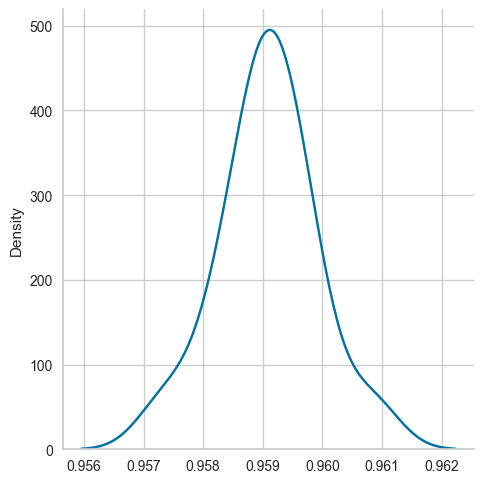

In [115]:
# Algorimo Random Forest
sns.displot(scores_random_scaler, kind = 'kde')

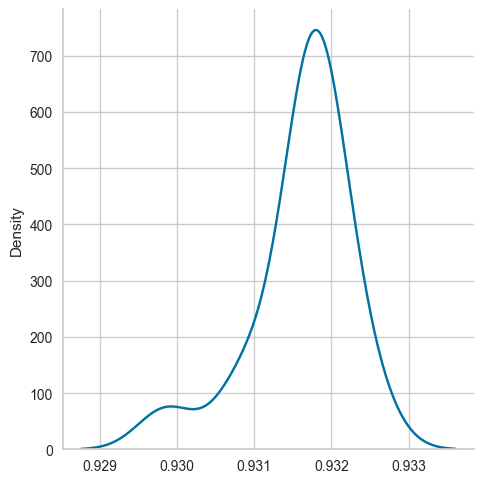

In [116]:
# Algoritmo KNN
sns.displot(scores_knn_scaler, kind = 'kde')

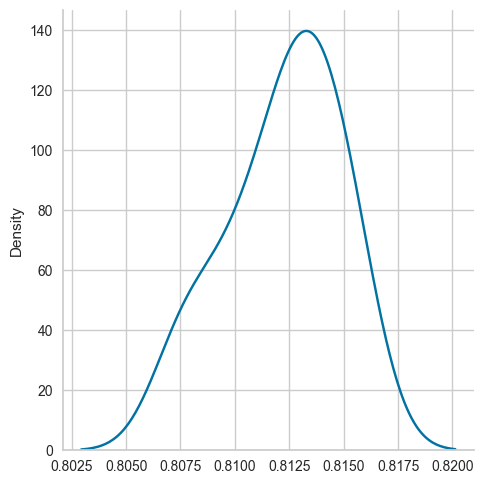

In [117]:
# Algoritmo Redes Neurais
sns.displot(scores_redes_scaler, kind = 'kde')

Podemos ver que o teste KNN não segue uma distribuição normal, portanto aplicarei outros testes

## Teste Anova

Agora, aplicarei o teste ANOVA a fim de comparar as variâncias entre as medianas

In [598]:
# Testando a hipótese nula de que os dados foram extraídos de uma distribuição normal
from scipy.stats import shapiro
alpha = 0.05
shapiro(scores_random_scaler),shapiro(scores_knn_scaler), shapiro(scores_redes_scaler)

(ShapiroResult(statistic=0.9733794927597046, pvalue=0.9045630693435669),
 ShapiroResult(statistic=0.8385272026062012, pvalue=0.011996658518910408),
 ShapiroResult(statistic=0.9427629709243774, pvalue=0.4183863699436188))

In [599]:
# Testando a hipótese nulo com nossos 3 algoritmos
from scipy.stats import f_oneway
p = f_oneway(scores_random_scaler,shapiro(scores_knn_scaler),scores_redes_scaler)
print(p)

F_onewayResult(statistic=23.73054655887223, pvalue=7.850253519177426e-07)


In [600]:
# Verificando se aceitaremos a hipótese nula ou nao
alpha = 0.05
pvalue= 2.204050466842667e-46
if  pvalue >= alpha:
    print('Hipotese nula aceita. Resultados são igual')
else:
    print('Hipotese nula rejeitada. Dados Diferentes')

Hipotese nula rejeitada. Dados Diferentes


In [124]:
# Criando umas tabela com a precisão
Accuracy = {'Algoritmo': ['Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest','Random Forest',
                          'KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN','KNN',
                          'Redes Neurais','Redes Neurais','Redes Neurais','Redes Neurais','Redes Neurais','Redes Neurais','Redes Neurais','Redes Neurais','Redes Neurais','Redes Neurais','Redes Neurais','Redes Neurais','Redes Neurais','Redes Neurais','Redes Neurais'],
            'Pontuação': np.concatenate([scores_random_scaler,scores_knn_scaler,scores_redes_scaler])}
Accuracy = pd.DataFrame(Accuracy)
Accuracy              

In [132]:
# Fazendo uma comparação multipla
from statsmodels.stats.multicomp import MultiComparison
comparação = MultiComparison(Accuracy['Pontuação'],Accuracy['Algoritmo'])

In [133]:
# Comparando
teste_anova = comparação.tukeyhsd()
print(teste_anova)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj  lower   upper  reject
-----------------------------------------------------------------
          KNN Random Forest   0.0275   0.0  0.0261  0.0289   True
          KNN Redes Neurais  -0.1194   0.0 -0.1208  -0.118   True
Random Forest Redes Neurais  -0.1469   0.0 -0.1483 -0.1454   True
-----------------------------------------------------------------


In [134]:
# Verificando a média de precisão
Accuracy.mean()

Pontuação    0.900975
dtype: float64

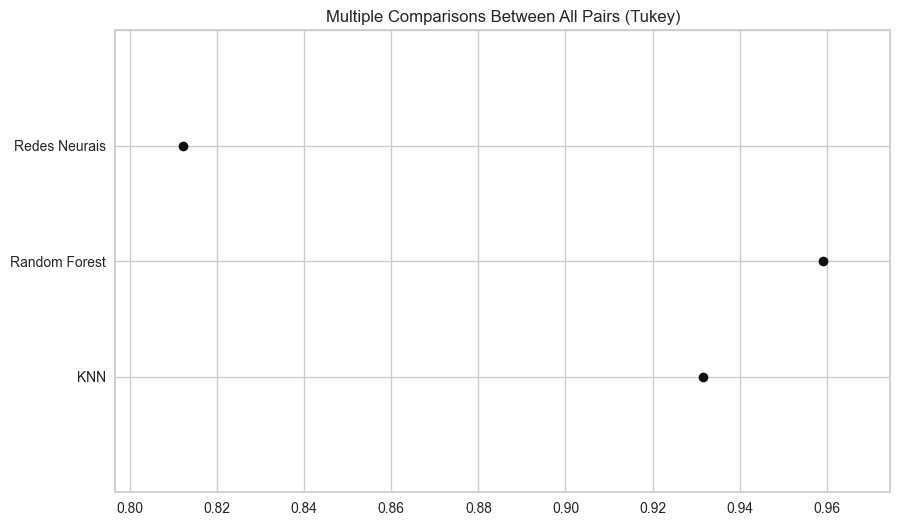

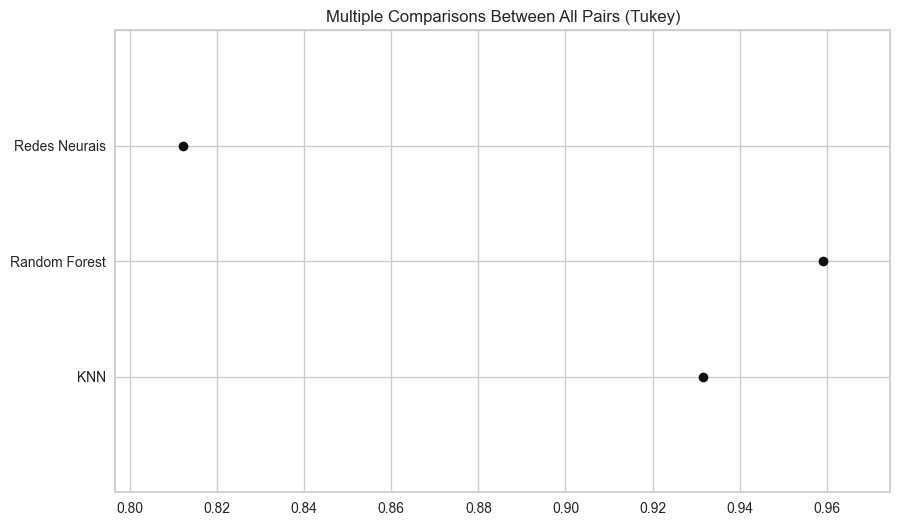

In [135]:
# Plotando gráfico de dispersão para verificarmos os algoritmos de acordo com a precisão
teste_anova.plot_simultaneous()

Como a hipótese nula foi rejeitada, portanto, poderei utilizar os 3 classificadores em meu algoritmo

## Combinação de classificadores

Agora, após fazer todos testes, combinaremos os 3 classificadores afim de obter o melhor resultado possível

In [147]:
# Criando um novo cliente hipotético (que sei que está em churn)
Novo_cliente = x_scaler[0]
Novo_cliente = Novo_cliente.reshape(1,-1)
Novo_cliente, Novo_cliente.shape

(array([[-0.29877723, -0.95773012, -1.01799435,  0.08418894, -1.01840607,
         -1.33103279, -0.75606167,  0.6512495 ,  1.08223556,  0.00817382]]),
 (1, 10))

In [159]:
# Aplicando os classificadores ao novo cliente
classificador_random = random_forest_scaler.predict(Novo_cliente)
classificador_knn = knn_scaler.predict(Novo_cliente)
classificador_redes = redes_neurais_scaler.predict(Novo_cliente)


In [162]:
# Verificando o resultado
classificador_random[0],classificador_knn[0], classificador_redes[0]

(1, 1, 1)

In [601]:
# Combinando os algoritmos afim de obter o melhor resultado
churn = 0
nao_churn =0

if classificador_random[0] == 1:
    churn +=1
else:
    nao_churn += 1
    
if classificador_knn[0] == 1:
    churn +=1
else:
    nao_churn += 1
    
if classificador_redes[0] == 1:
    churn +=1
else:
    nao_churn += 1

if churn > nao_churn:
    print('Cliente está em Churn')
elif paga == nao_paga:
    print('Empate')
else:
    print('Cliente não está em Churn')

Cliente está em Churn
